## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_bivariate import *

## About the Dataset
In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
df = pd.read_csv('data/fuel-econ.csv')
df.shape

(3929, 20)

In [3]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


### Exercise 1: Scatterplots
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?
3. (Optional) Plot a dotted, red, diagonal line from the lower right to upper left of the plot for comparison.

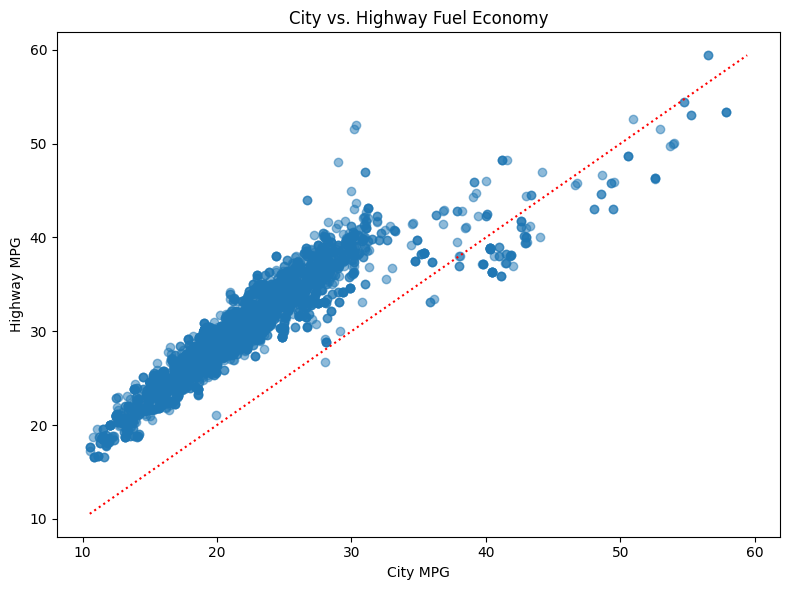

In [5]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatterplot
plt.scatter(df['city'], df['highway'], alpha=0.5)

# Optional: add diagonal reference line (city = highway)
min_val = min(df['city'].min(), df['highway'].min())
max_val = max(df['city'].max(), df['highway'].max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='dotted')

plt.xlabel("City MPG")
plt.ylabel("Highway MPG")
plt.title("City vs. Highway Fuel Economy")

plt.tight_layout()
plt.show()

1. General relationship

City and highway fuel economy are positively correlated.
Cars with higher city mpg tend to also have higher highway mpg.
Highway mpg is typically a little higher than city mpg for almost all cars.

2. Any unusual points?

Yes — you may notice:

A few cars with unusually high city or highway mpg (e.g., hybrids or plug-ins)

A few points far off the main cloud (possible data entry issues or rare models)

These stand out visually when plotted.

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    1. The relationship is appears fairly linear until util about 30mpg. But some ultra-efficient cars
    tend to be much more efficient in cities. This might be worth investigating.
    
    2. There are some points that seem in-between the two trends discussed above.
    
    3. We could also plot two lines, and try to capture both trends.
    


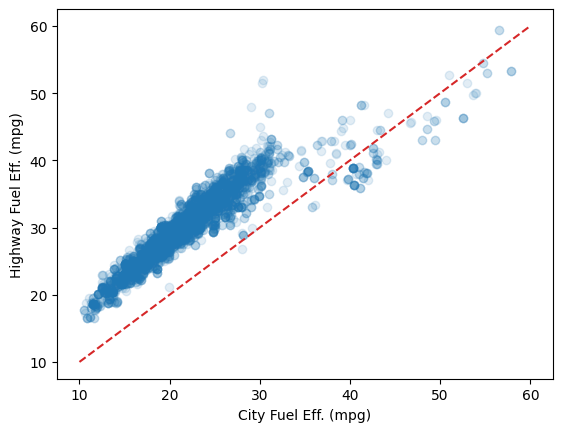

In [4]:
scatterplot_solution()

### Exercise 2: Heat map
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map (2d hist) to depict the data.** How strong is this trend?

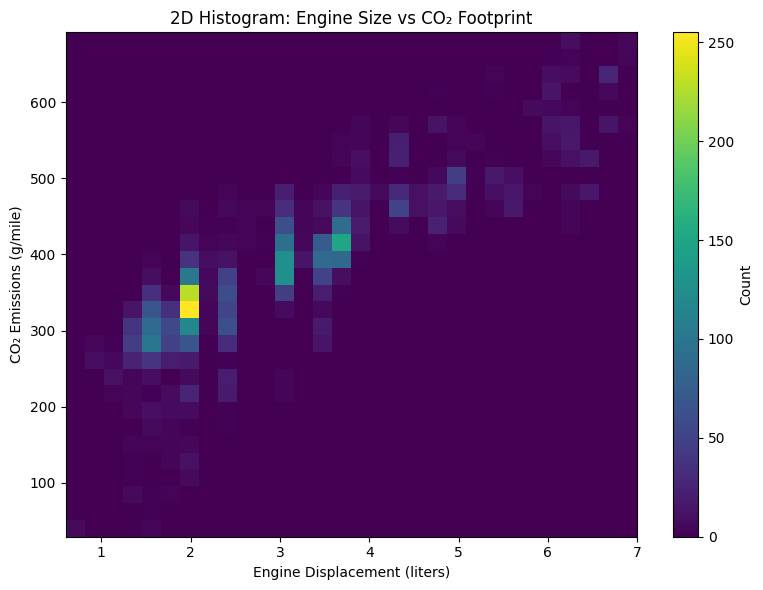

In [6]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.hist2d(df['displ'], df['co2'], bins=30, cmap='viridis')
plt.colorbar(label='Count')

plt.xlabel("Engine Displacement (liters)")
plt.ylabel("CO₂ Emissions (g/mile)")
plt.title("2D Histogram: Engine Size vs CO₂ Footprint")

plt.tight_layout()
plt.show()

There is a strong positive relationship:
Larger engine sizes → higher CO₂ emissions.

The heat map will show:

Dense clusters forming a clear upward-right pattern.

Few cars with large engines but low CO₂.

Few cars with small engines but very high CO₂.

This indicates the trend is strong and consistent.

### Expected Output: Exercise #2


    The expelled co2 clearly depends engine size, but in a non-linear fashion. There are notably fewer
    entries in the extreme bins, however, compared to smaller engines.

    


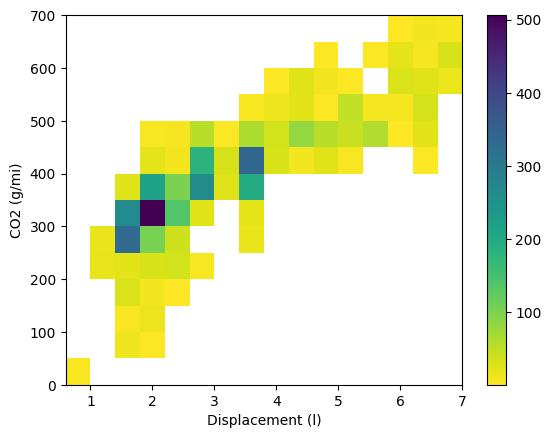

In [7]:
heatmap_solution()

### Exercise 3: Box plot
Use a box plot to explore the relationship between the fuel type and the engine size.  Fuel type classes can be found in the `fuelType` column, while the engine sizes are in the `displ` column (in liters). Make sure to properly order your fuel classes (for example, plot from regular to premium gasoline, or vice-versa).

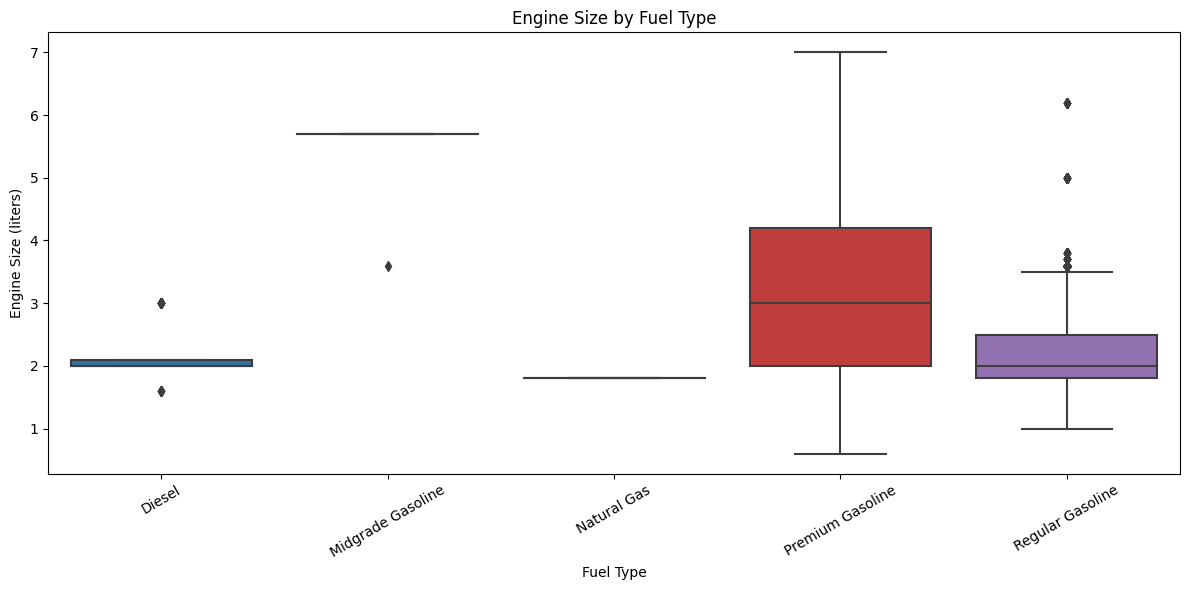

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Look at unique fuel types to decide on sensible ordering
fuel_order = sorted(df['fuelType'].unique())   # simple alphabetical order
# If you want a more meaningful order, replace this with your own list:
# fuel_order = ["Regular", "Midgrade", "Premium", "Diesel", "Electricity", "CNG"]

sns.boxplot(
    data=df,
    x='fuelType',
    y='displ',
    order=fuel_order
)

plt.xlabel("Fuel Type")
plt.ylabel("Engine Size (liters)")
plt.title("Engine Size by Fuel Type")

plt.xticks(rotation=30)   # helps readability
plt.tight_layout()
plt.show()

Interpretation

Gasoline vehicles (regular → premium) typically cluster in the small to medium displacement range.

Diesel vehicles usually have larger engine displacement than gasoline equivalents.

Electric vehicles (if present) often show displ = 0 (since they have no combustion engine).

Box plot helps compare medians and spread of engine sizes across fuel classes.

### Expected output


    Note here we have a larger variation Premium and Regular gasoline vehicles. It's likely these are
    the most prominent classes. There are very few for the other grades, so we can't draw any
    conclusions for them.

    


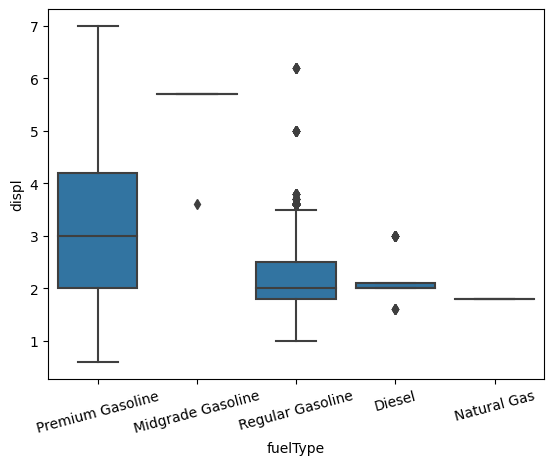

In [9]:
boxplot_solution()

### Exercise 4: Violin plot
Use a violin plot to explore the relationship between the drive type and highway performance. Drive type includes "all-wheel drive", "manual", etc. Drive type can be found in the `drive` column, while highway efficiency in `highway`.

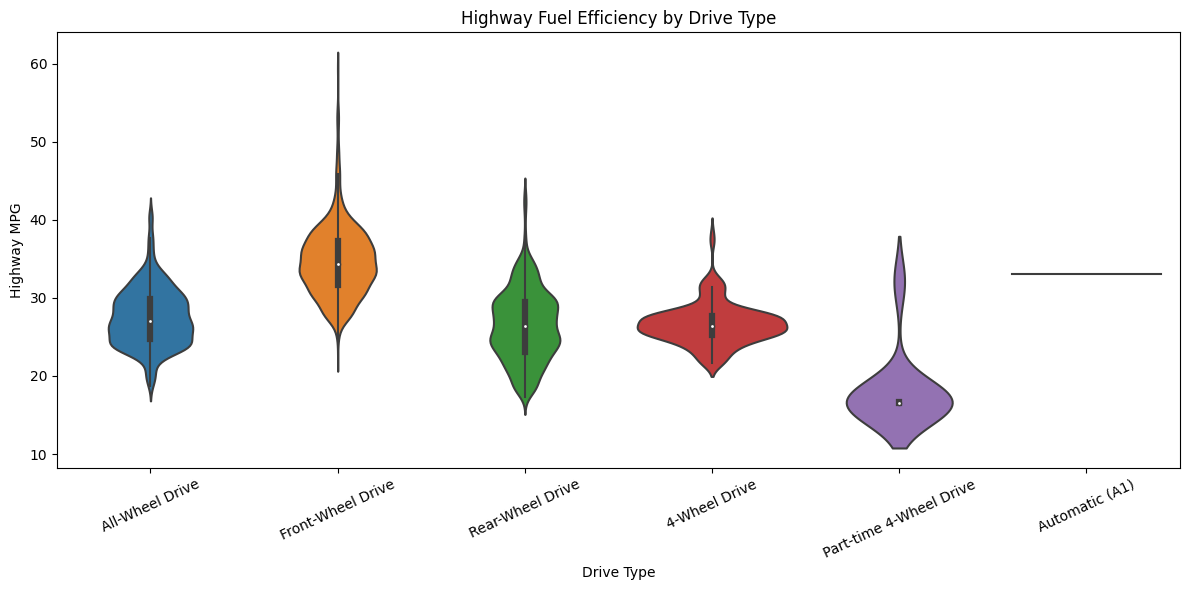

In [10]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df,
    x='drive',
    y='highway',
    inner='box'    # shows the median & quartiles inside each violin
)

plt.xlabel("Drive Type")
plt.ylabel("Highway MPG")
plt.title("Highway Fuel Efficiency by Drive Type")

plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

Interpretation 

Front-wheel drive cars typically have higher highway mpg compared to AWD or 4WD.

All-wheel drive / 4-wheel drive vehicles usually have lower fuel efficiency, so their distributions appear lower on the y-axis.

The shape of each violin shows how common different mpg values are for that drive type.

### Expected output


    We should probably drop the Automatic (A1) class, as there is only one entry. Otherwise, we see
    All-Wheel, Front-Wheel, and Rear Wheel drive appear fairly unimodel. 4-Wheel Drive and Part-time
    4-Wheel appear more bimodal, and much less efficient.

    On average, front-wheel drive appears the most efficient.
    


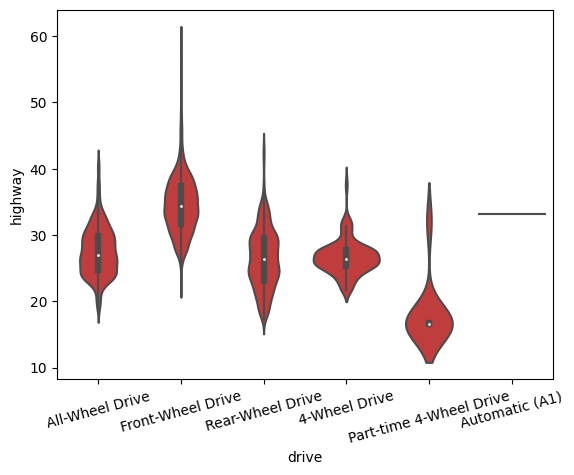

In [11]:
violin_solution()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solution_bivariate.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!